## Marche aléatoire
Une marche aléatoire est un modèle de série temporelle dans lequel la valeur de la variable de la série temporelle augmente ou diminue (step up ou down) avec une probabilité égale à chaque pas de temps, c'est-à-dire que la valeur attendue de l'observation actuelle est égale à l'observation précédente. Elle est formellement définie ci-dessous :
 
$$x_t=x_{t-1}+w_t$$
où $w_t$ est une série discrète de bruit blanc.$$E[x_t]=x_{t-1}$$

La signification d'une marche aléatoire est qu'elle est non stationnaire car si la moyenne d'une marche aléatoire est toujours nulle, la covariance est en fait dépendante du temps. En particulier, la covariance est égale à la variance multipliée par le temps. Par conséquent, plus le temps augmente, plus la variance augmente.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

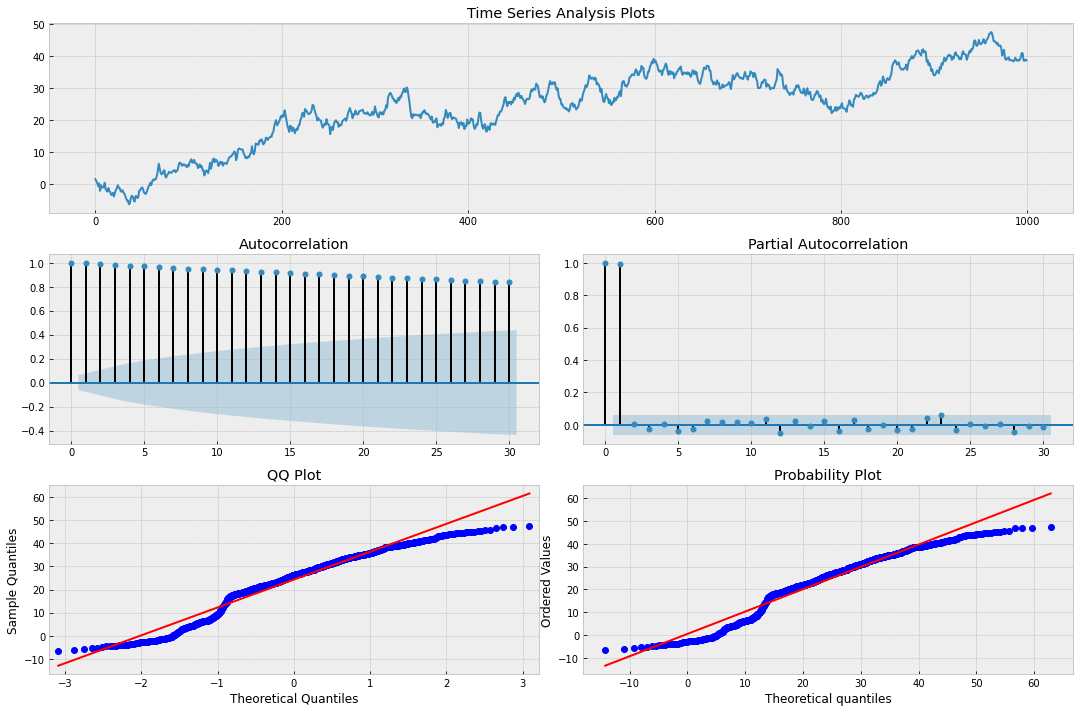

In [2]:
# tsplot definition

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        # mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

# Random Walk without a drift

np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

La différence des séries de marche aléatoire devraient être égale à un bruit blanc :

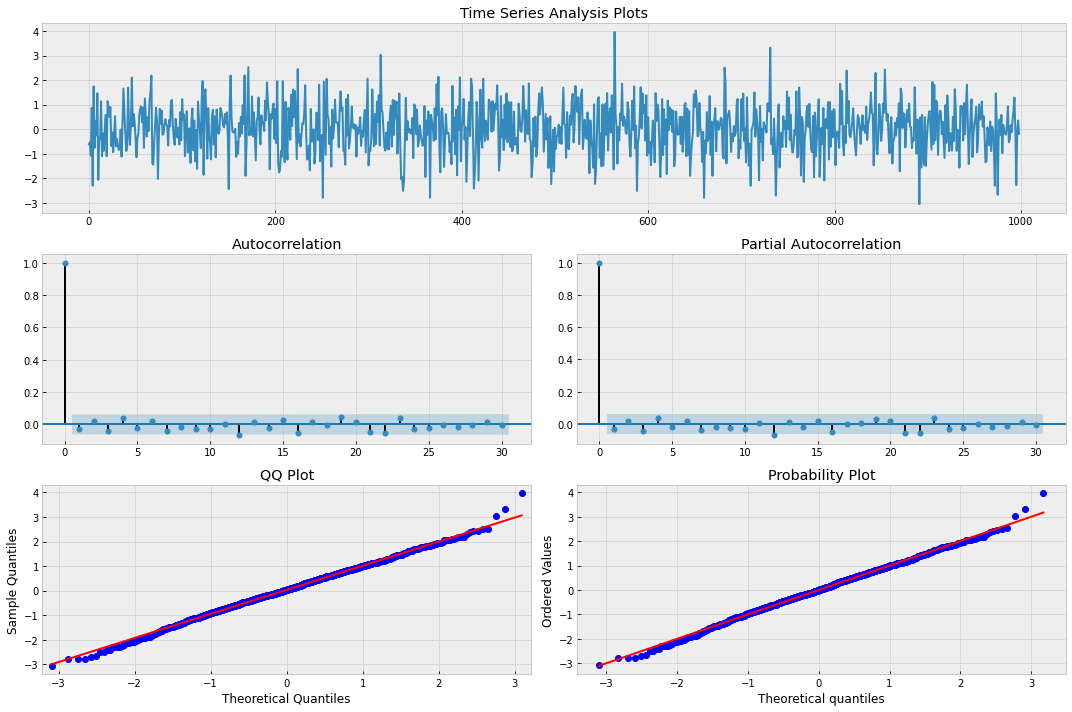

In [3]:
# First difference of simulated Random Walk series
_ = tsplot(np.diff(x), lags=30)

La différence est bien un bruit blanc.

Appliquons maintenant notre modèle de marche aléatoire à quelques données financières réelles.

In [4]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource
startDateStr = '2014/12/31'
endDateStr = '2017/12/31'
cachedFolderName = 'yahooData/'
dataSetId = 'testPairsTrading'
instrumentIds = ['^GSPC','DOW','MSFT']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
data = ds.getBookDataByFeature()['adjClose']
# log returns
lrets = np.log(data/data.shift(1)).dropna()

Processing data for stock: ^GSPC
Processing data for stock: DOW
Processing data for stock: MSFT
20% done...
40% done...
60% done...
80% done...


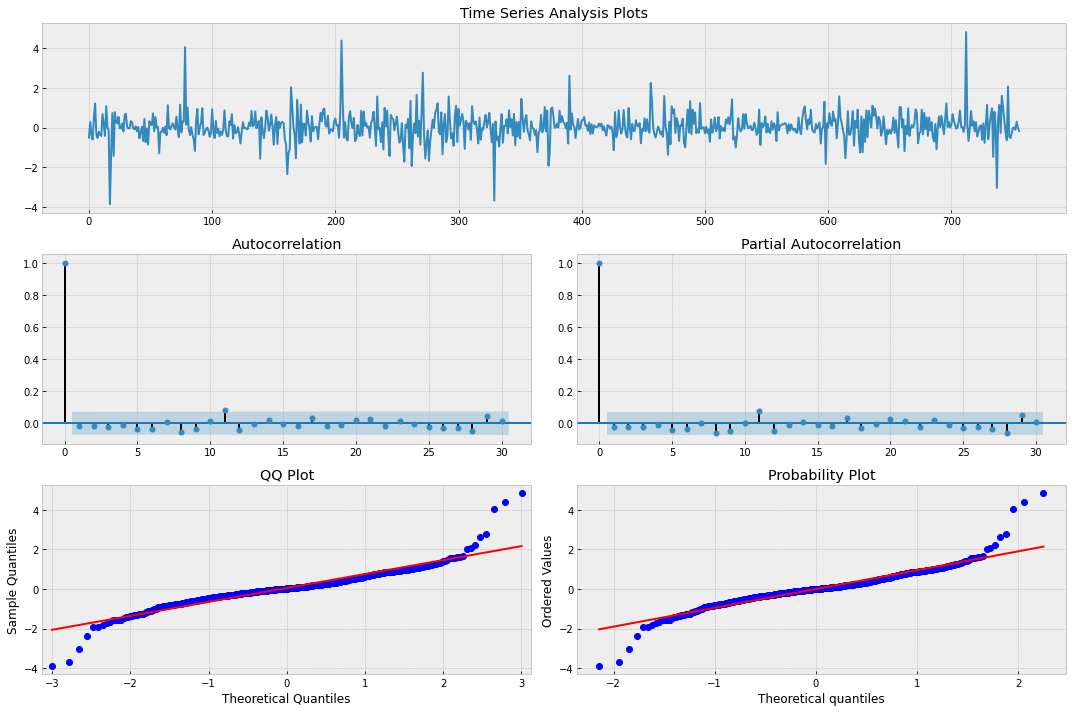

In [7]:
# First difference of MSFT prices
_ = tsplot(np.diff(data.MSFT), lags=30)

Là encore, la série chronologique est assez semblable au bruit blanc, avec des "queues lourdes" similaires, quelques pics dans les graphiques du FAC et du PACF.